In [1]:
import torch

In [2]:
w = torch.tensor(4.0, requires_grad=True)

In [3]:
x = torch.tensor(2.0, requires_grad=True)

In [4]:
b = torch.tensor(6.0, requires_grad=True)

In [5]:
y = w*x+b

In [6]:
y

tensor(14., grad_fn=<AddBackward0>)

In [18]:
y.backward()

In [19]:
y.grad

In [20]:
x.grad

In [21]:
w.grad

tensor(2.)

In [22]:
b.grad

tensor(1.)

In [23]:
x

tensor(2.)

In [24]:
y

tensor(14., grad_fn=<AddBackward0>)

In [25]:
w

tensor(4., requires_grad=True)

In [7]:
torch.autograd.backward([y], torch.tensor(2.0))

In [8]:
x.grad

In [9]:
y.grad

In [10]:
w.grad

tensor(4.)

In [11]:
b.grad

tensor(2.)

In [7]:
with torch.autograd.profiler.profile() as prof:
    torch.autograd.backward([y], torch.tensor(2.0))
print(prof.key_averages().table(sort_by="self_cpu_time_total"))



-----------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
Name                                 Self CPU total %  Self CPU total   CPU total %      CPU total        CPU time avg     CUDA total %     CUDA total       CUDA time avg    Number of Calls  
-----------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
clone                                39.59%           47.148us         39.59%           47.148us         47.148us         NaN              0.000us          0.000us          1                
mul                                  18.45%           21.968us         18.45%           21.968us         10.984us         NaN              0.000us          0.000us          2                
torch::autograd::AccumulateGrad      15.97% 

In [7]:
with torch.autograd.profiler.profile() as prof:
    torch.autograd.grad(y,x)
print(prof.key_averages().table(sort_by="self_cpu_time_total"))


------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
Name                            Self CPU total %  Self CPU total   CPU total %      CPU total        CPU time avg     CUDA total %     CUDA total       CUDA time avg    Number of Calls  
------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
mul                             49.50%           37.370us         49.50%           37.370us         18.685us         NaN              0.000us          0.000us          2                
MulBackward0                    36.12%           27.268us         85.62%           64.638us         64.638us         NaN              0.000us          0.000us          1                
AddBackward0                    8.58%            6.477us          8.5

As we can see while calculating derivative w.r.t. x PyTorch calculates partial derivatives and total derivative is the same as considering all partial derivatives simultaneously. But it doesn't update `tensor.grad`.

In [7]:
torch.autograd.grad(y,x)

(tensor(4.),)

In [8]:
w.grad

In [9]:
x.grad

In [10]:
y.grad

In [11]:
b.grad

In [10]:
(2*64)*(2*8)*4

8192

In [9]:
import torchviz

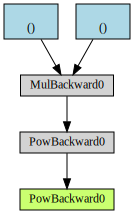

In [10]:
torchviz.make_dot(y)